In [2]:
import pandas as pd

file_path = 'data/housing-train-data-6628a4723213d886993351.csv'
final_data = pd.read_csv(file_path)

In [3]:
import pandas as pd

file_path = 'data/final_data.csv'
final_data = pd.read_csv(file_path)

# Régression Linéaire

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Préparation des données
X = final_data.drop('median_house_value', axis=1)
y = final_data['median_house_value']

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Création des transformateurs pour les données numériques et catégorielles
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation par la médiane pour les valeurs numériques
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation par la valeur la plus fréquente pour les catégorielles
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Assembler les transformateurs
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Création du pipeline final avec préprocesseur et modèle de régression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de R^2
r_squared = r2_score(y_test, y_pred)
print(r_squared)


0.6497677372965036


In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [7]:
print(vif_data)

                       feature           VIF
0                    longitude     39.931083
1                     latitude     32.905845
2           housing_median_age      1.392644
3                   population      6.006056
4                   households      6.102535
5                median_income      2.224098
6    ocean_proximity_<1H OCEAN  49807.754181
7       ocean_proximity_INLAND  36696.888524
8       ocean_proximity_ISLAND     23.268598
9     ocean_proximity_NEAR BAY  10242.010031
10  ocean_proximity_NEAR OCEAN  14238.895264
11         rooms_per_household      1.352729
12           bedrooms_per_room      2.101344
13              distance_to_la     13.159244
14              distance_to_sf     16.146722


In [10]:
import numpy as np

# Calculer la moyenne et l'écart-type des prédictions
mean_y_pred = np.mean(y_pred)
std_y_pred = np.std(y_pred)

# Calculer le Z-score pour chaque prédiction
z_scores = (y_pred - mean_y_pred) / std_y_pred

# Afficher les Z-scores
print("Z-scores des prédictions:", z_scores)

Z-scores des prédictions: [ 3.16230966  0.53440681 -0.01086409 ...  0.72717936  0.74094882
  0.87933197]


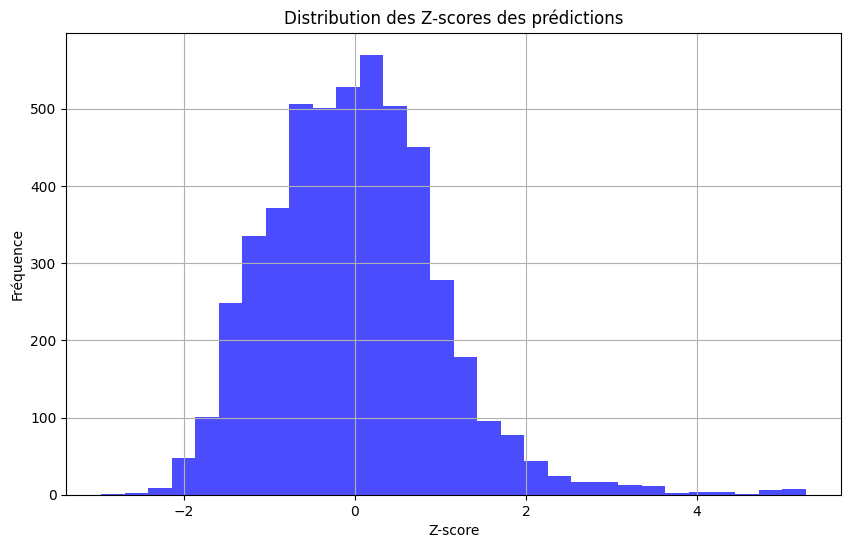

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=30, color='blue', alpha=0.7)
plt.title('Distribution des Z-scores des prédictions')
plt.xlabel('Z-score')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcul de l'Erreur Quadratique Moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calcul de l'Erreur Absolue Moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calcul de la RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
rmse

MSE: 4565192294.430964
MAE: 49248.08094469116


67566.2067488694

# Random Forest

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

final_data = final_data.drop('Unnamed: 0', axis=1)

# Préparation des données
X = final_data.drop('median_house_value', axis=1)
y = final_data['median_house_value']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

# Identification des types de caractéristiques
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Transformateurs pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformateurs pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Préprocesseur avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=200))
])

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de R^2
r_squared = r2_score(y_test, y_pred)
print("R^2 score avec la forêt aléatoire :", r_squared)

R^2 score avec la forêt aléatoire : 0.8181844926910294


In [17]:
all_features = [col for col in final_data.columns if col != 'median_house_value']

performance = {}

for feature in all_features:
    X = final_data[[feature]]
    y = final_data['median_house_value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    model = LinearRegression()

    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)

    performance[feature] = score

    print(f"R² score pour {feature} comme prédicteur de qualité: {score:.4f}")

best_feature = max(performance, key=performance.get)
print(f"La caractéristique qui prédit le mieux la median_house_value est: {best_feature} avec un R² de {performance[best_feature]:.4f}")

R² score pour longitude comme prédicteur de qualité: 0.0032
R² score pour latitude comme prédicteur de qualité: 0.0153
R² score pour housing_median_age comme prédicteur de qualité: 0.0151
R² score pour total_rooms comme prédicteur de qualité: 0.0178


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
all_features = [col for col in final_data.columns if col != 'median_house_value']
X = final_data[all_features]

y = final_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

all_features_model = LinearRegression()

all_features_model.fit(X_train, y_train)

all_features_score = all_features_model.score(X_test, y_test)

print(f"R² score for regression with all features: {all_features_score:.4f}")

ValueError: could not convert string to float: 'NEAR BAY'

In [19]:
y = final_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

multiple_model = LinearRegression()

multiple_model.fit(X_train, y_train)

multiple_score = multiple_model.score(X_test, y_test)

print(f"R² score for multiple regression: {multiple_score:.4f}")

ValueError: could not convert string to float: 'NEAR BAY'

In [20]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")

ValueError: could not convert string to float: 'NEAR BAY'

In [21]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

for i in range(X_train.shape[1]):
    print(f"{X_train.columns[i]} - Ranked: {rfe.ranking_[i]}")

ValueError: could not convert string to float: 'NEAR BAY'

In [34]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5).fit(X_train, y_train)
importance = np.abs(lasso.coef_)
print("Selected features: ", np.array(X_train.columns)[importance > 0])


ValueError: could not convert string to float: '<1H OCEAN'

# KNN

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score


# Suppression de la colonne 'Unnamed: 0'
final_data = final_data.drop('Unnamed: 0', axis=1)

# Préparation des données
X = final_data.drop('median_house_value', axis=1)
y = final_data['median_house_value']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

# Identification des types de caractéristiques
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Transformateurs pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformateurs pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Préprocesseur avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Configuration des paramètres pour le GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)

# Entraînement du GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres: ", grid_search.best_params_)

# Meilleur score R^2 obtenu
print("Meilleur score R^2: ", grid_search.best_score_)

# Prédiction avec le meilleur modèle trouvé
y_pred = grid_search.predict(X_test)

# Calcul de R^2
r_squared = r2_score(y_test, y_pred)
print("R^2 score avec KNN :", r_squared)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres:  {'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Meilleur score R^2:  0.7170471343985434
R^2 score avec KNN : 0.7347990403384093


In [7]:
from sklearn import set_config

set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('knn', KNeighborsRegressor())])

In [8]:
import joblib

# Enregistrement du modèle
joblib.dump(pipeline, 'knn_model.joblib')

['knn_model.joblib']

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de R^2
r_squared = r2_score(y_test, y_pred)
print("R^2 score avec KNN :", r_squared)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) :", mae)

# Calcul de la moyenne et de l'écart-type des valeurs prédites
mean_y_pred = np.mean(y_pred)
std_y_pred = np.std(y_pred)

# Calcul du score Z pour les prédictions
z_scores = (y_pred - mean_y_pred) / std_y_pred

# Affichage de quelques scores Z
print("Quelques scores Z des prédictions :", z_scores[:5])


R^2 score avec KNN : 0.7197248561083154
Mean Squared Error (MSE) : 3668299486.9766
Mean Absolute Error (MAE) : 40846.519014937425
Quelques scores Z des prédictions : [ 3.04827917  0.71380327 -0.43715401 -0.40276041 -0.51024041]


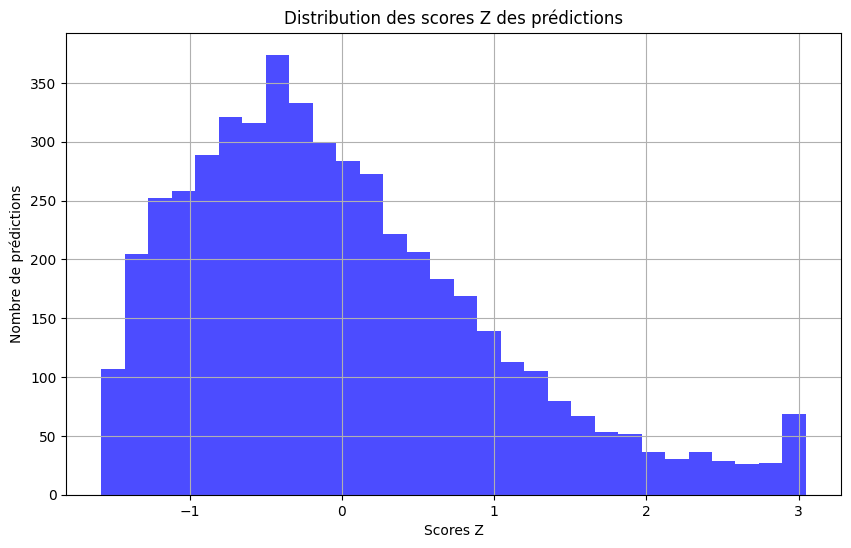

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=30, color='blue', alpha=0.7)
plt.title('Distribution des scores Z des prédictions')
plt.xlabel('Scores Z')
plt.ylabel('Nombre de prédictions')
plt.grid(True)
plt.show()